# Data Loading

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

data = pd.read_csv("./train_new.csv")

# data set link https://www.kaggle.com/c/cudlfinance/data?select=train_new.csv

In [3]:
data.head()

,Unnamed: 0,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS,Cash
0,01/01/2015,40.94,53.630,159.28,110.38,65.44,90.16,38.06,45.02,89.31,...,43.290,92.45,53.27,36.5155,38.07,52.3831,113.42,28.510,43.03,0.0355
1,02/01/2015,40.56,53.910,158.56,109.33,65.89,90.46,37.31,44.90,88.84,...,43.600,92.83,51.93,36.2257,38.08,52.0236,112.59,28.290,43.31,0.0152
2,05/01/2015,39.80,53.875,156.47,106.25,64.65,89.69,37.07,44.91,87.34,...,42.795,90.29,51.57,35.4353,35.71,50.9666,116.79,27.230,43.05,0.0101
3,06/01/2015,39.18,53.040,156.36,106.26,64.33,90.18,36.13,44.40,86.71,...,42.180,89.81,50.93,34.9611,35.50,50.3410,115.80,26.190,42.63,0.0253
4,07/01/2015,39.70,53.010,159.72,107.75,66.93,91.98,37.28,44.76,88.53,...,42.195,90.72,52.25,35.4089,35.78,52.0092,118.68,26.435,43.51,0.0203


In [4]:
data.columns

Index(['Unnamed: 0', 'A ', 'AAL ', 'AAP ', 'AAPL ', 'ABBV ', 'ABC ', 'ABMD ',
       'ABT ', 'ACN ',
       ...
       'XLNX ', 'XOM ', 'XRAY ', 'XRX ', 'XYL ', 'YUM ', 'ZBH ', 'ZION ',
       'ZTS ', 'Cash'],
      dtype='object', length=507)

In [5]:
# null values
data.isna().sum()

Unnamed: 0    0
A             0
AAL           0
AAP           0
AAPL          0
             ..
YUM           0
ZBH           0
ZION          0
ZTS           0
Cash          0
Length: 507, dtype: int64

# Analysis of the Trend

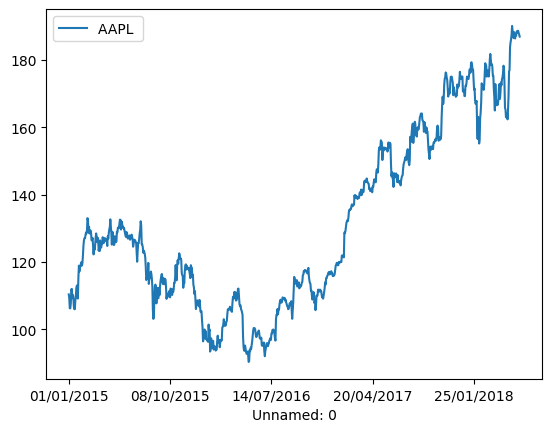

In [6]:
import matplotlib.pyplot as plt

# matplot lib plot
data.plot.line(x = 'Unnamed: 0', y = 'AAPL ')
plt.show()

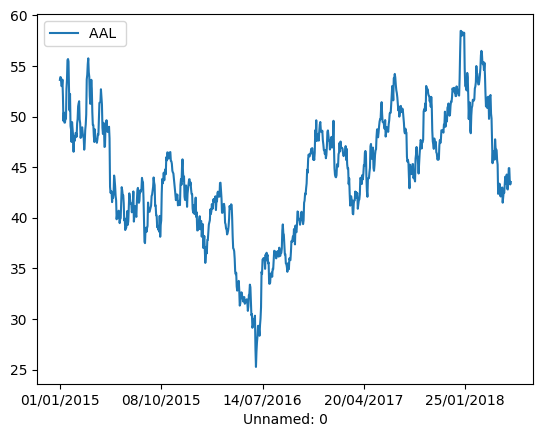

In [7]:

data.plot.line(x = 'Unnamed: 0', y = 'AAL ')
plt.show()

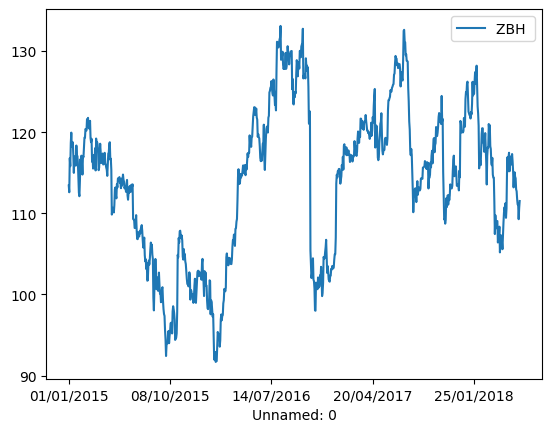

In [8]:

# matplot lib plot
data.plot.line(x = 'Unnamed: 0', y = 'ZBH ')
plt.show()

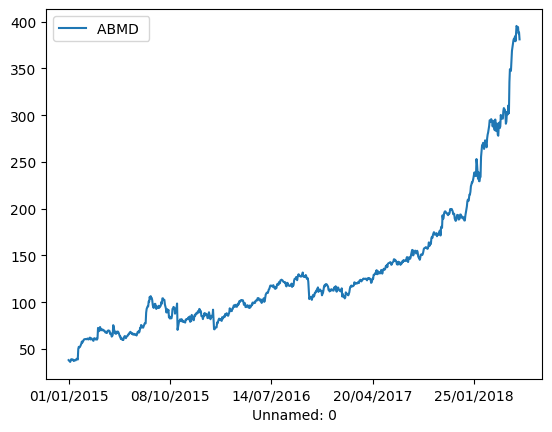

In [9]:

# matplot lib plot
data.plot.line(x = 'Unnamed: 0', y = 'ABMD ')
plt.show()

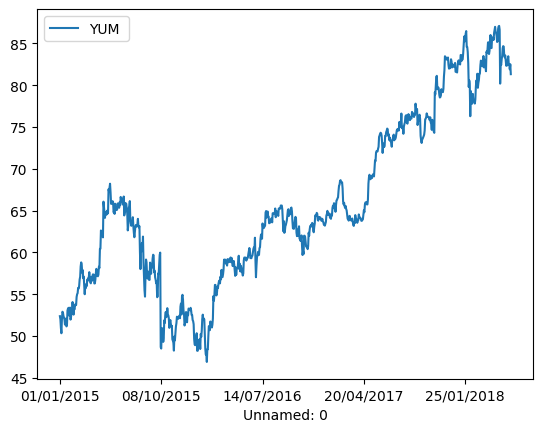

In [10]:

# matplot lib plot
data.plot.line(x = 'Unnamed: 0', y = 'YUM ')
plt.show()

# Selecting stock

In [11]:
data_stock = data['AAPL '] # Selecting apple stock from dataset

In [12]:
data_stock.shape # Shape of the dataset

(891,)

In [13]:
891 - 178


713

In [14]:
data_stock_np = np.array(data_stock)

In [15]:
data_stock_np[-15]

188.59

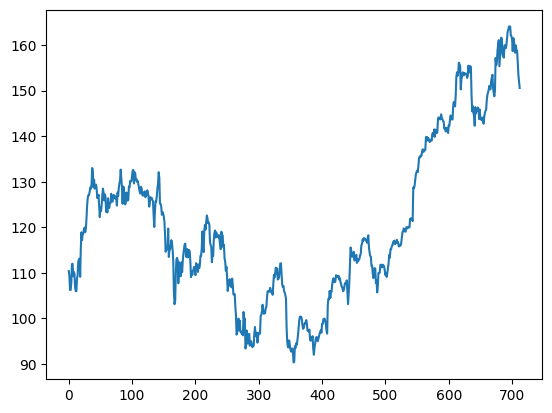

In [16]:
data_stock[:713].plot.line(x = 'Unnamed: 0', y = 'AAPL ')
plt.show()

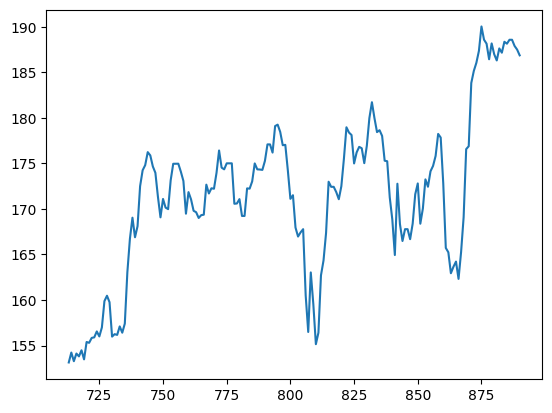

In [17]:
data_stock[-178:].plot.line(x = 'Unnamed: 0', y = 'AAPL ')
plt.show()

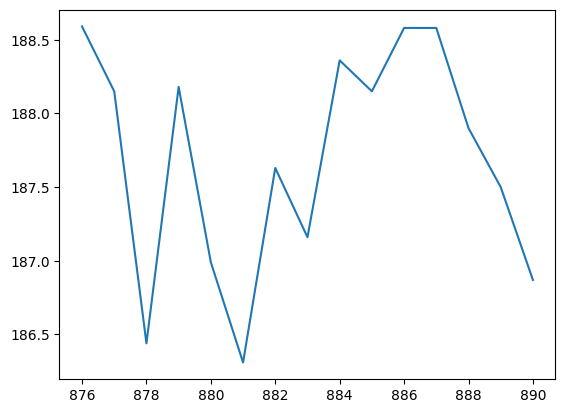

In [18]:
data_stock[-15:].plot.line(x = 'Unnamed: 0', y = 'AAPL ')
plt.show()

# Utility function

In [19]:
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Bidirectional
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy
from tensorflow.keras import layers

# convert into supervised
def series_data_to_supervised_data(data, lag=1):
	df = pd.DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df
 
# difference between values
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)
 

def inverse_the_difference(history_data, yhat, interval=1):
 
  return (yhat+history_data[-interval])
 
def scale(train, test):

	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)

	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)

	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled
 

def invert_scale(scaler, X, value):
	temp = [x for x in X] + [value]
	array = numpy.array(temp)
	array = array.reshape(1, len(array))
	data_inverted = scaler.inverse_transform(array)
	return data_inverted[0, -1]
 
def fit_lstm(train, batchSize, epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batchSize, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
 
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(epoch):
		model.fit(X, y, epochs=1, batch_size=batchSize, verbose=0, shuffle=False)
		model.reset_states()
	return model


def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]

def fit_rnn(train,batchSize,epoch, neurons):
  X, y = train[:, 0:-1], train[:, -1]
  X = X.reshape(X.shape[0], 1, X.shape[1])

  print("X.shape[1]), ",X.shape[1])
  print("X.shape[2]) ",X.shape[2])

  model = Sequential()
  model.add(layers.SimpleRNN(neurons, batch_input_shape=(batchSize, X.shape[1], X.shape[2])))
  model.add(layers.Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')
 
 
  for i in range(epoch):
    model.fit(X, y, epochs=1, batch_size=batchSize, verbose=0, shuffle=False )
    model.reset_states()
  return model

def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]
  
def forecast_rnn(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]
  
def fit_cnn(train,batchSize,epoch, neurons):
  X, y = train[:, 0:-1], train[:, -1]
  X = X.reshape(X.shape[0], 1, X.shape[1])
  print("X.shape[1]), ",X.shape[1])
  print("X.shape[2]) ",X.shape[2])
  
  model = Sequential()
  model.add(layers.Conv1D(neurons,1, batch_input_shape=(batchSize, X.shape[1], X.shape[2])))
  model.add(layers.GlobalMaxPooling1D())
  model.add(layers.Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')
  
  for i in range(epoch):
    model.fit(X, y, epochs=1, batch_size=batchSize, verbose=0, shuffle=False )
    model.reset_states()
  return model

def forecast_cnn(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]
  

  
def fit_bilstm(train,batchSize,epoch, neurons):
  X, y = train[:, 0:-1], train[:, -1]
  X = X.reshape(X.shape[0], 1, X.shape[1])
  model = Sequential()


  print("X.shape[1]), ",X.shape[1])
  print("X.shape[2]) ",X.shape[2])
  
  model = Sequential()
  model.add(Bidirectional(LSTM(neurons, batch_input_shape=(batchSize, X.shape[1], X.shape[2]), stateful=True)))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')

  for i in range(epoch):
    model.fit(X, y, epochs=1, batch_size=batchSize, verbose=0, shuffle=False )
    model.reset_states()
  return model


# make a one-step forecast
def forecast_bilstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]
  

<ipython-input-19-1090d968874b>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


# LSTM

In [20]:
data_stock.shape

(891,)

In [21]:
0.20 * 891

178.20000000000002

In [22]:
test_scaled

NameError: name 'test_scaled' is not defined


 Test RMSE: 2.355


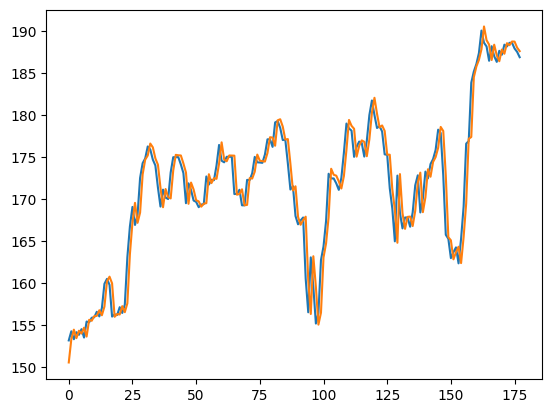

In [23]:

# making the data to be stationary
raw_values = np.array(data_stock)
diff_values = difference(raw_values, 1)
# converting into supervised
supervised = series_data_to_supervised_data(diff_values, 1)
supervised_values = supervised.values

# splitting the dataset 
train, test = supervised_values[0:-178], supervised_values[-178:]

# modify the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)
 
# Fittting into model
lstm_model = fit_lstm(train_scaled, 1, 1, 4)

 
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)
 
# forward validation
predictions = list()
for i in range(len(test_scaled)):
	# one step forecasting at a time
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# inverting the scale
	yhat = invert_scale(scaler, X, yhat)
  
	yhat = inverse_the_difference(raw_values, yhat, len(test_scaled)-i+1)
	# storing the forecasted data
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	#print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
 



# performance of the model
rmse = sqrt(mean_squared_error(raw_values[-178:], predictions))
print('\n Test RMSE: %.3f' % rmse)
# actual price vs predicted price
pyplot.plot(raw_values[-178:])
pyplot.plot(predictions)
pyplot.show()

## Over 15 test rows


 Test RMSE: 1.038


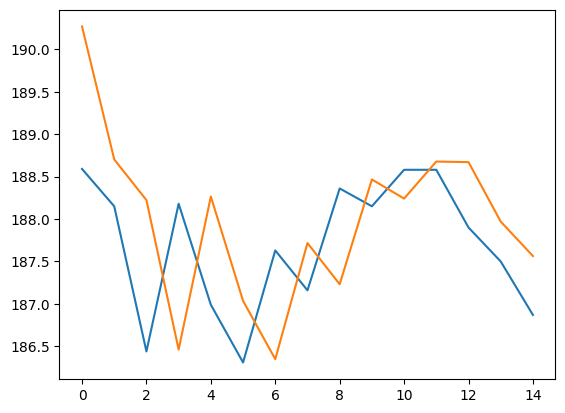

In [24]:

# making the data to be stationary
raw_values = np.array(data_stock)
diff_values = difference(raw_values, 1)
# converting into supervised
supervised = series_data_to_supervised_data(diff_values, 1)
supervised_values = supervised.values

# splitting the dataset 
train, test = supervised_values[0:-15], supervised_values[-15:]

# modify the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)
 
# Fittting into model
lstm_model = fit_lstm(train_scaled, 1, 1, 4)

 
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)
 
# forward validation
predictions = list()
for i in range(len(test_scaled)):
	# one step forecasting at a time
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# inverting the scale
	yhat = invert_scale(scaler, X, yhat)
  
	yhat = inverse_the_difference(raw_values, yhat, len(test_scaled)-i+1)
	# storing the forecasted data
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
 



# performance of the model
rmse = sqrt(mean_squared_error(raw_values[-15:], predictions))
print('\n Test RMSE: %.3f' % rmse)
# actual price vs predicted price
pyplot.plot(raw_values[-15:])
pyplot.plot(predictions)
pyplot.show()

# RNN

X.shape[1]),  1
X.shape[2])  1
Month=1, Predicted=149.953845, Expected=153.140000
Month=2, Predicted=154.496075, Expected=154.230000
Month=3, Predicted=154.847179, Expected=153.280000
Month=4, Predicted=152.876426, Expected=154.120000
Month=5, Predicted=154.612096, Expected=153.810000
Month=6, Predicted=153.725385, Expected=154.480000
Month=7, Predicted=154.886893, Expected=153.480000
Month=8, Predicted=153.051646, Expected=155.390000
Month=9, Predicted=156.414292, Expected=155.300000
Month=10, Predicted=155.325577, Expected=155.840000
Month=11, Predicted=156.181684, Expected=155.900000
Month=12, Predicted=156.000799, Expected=156.550000
Month=13, Predicted=156.946863, Expected=156.000000
Month=14, Predicted=155.795441, Expected=156.990000
Month=15, Predicted=157.557183, Expected=159.880000
Month=16, Predicted=161.380160, Expected=160.470000
Month=17, Predicted=160.836769, Expected=159.760000
Month=18, Predicted=159.475682, Expected=155.980000
Month=19, Predicted=154.236929, Expected=1

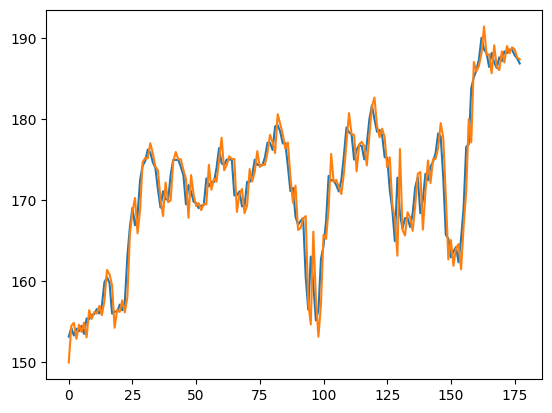

In [25]:

raw_values = np.array(data_stock)
diff_values = difference(raw_values, 1)
# converting into supervised
supervised = series_data_to_supervised_data(diff_values, 1)
supervised_values = supervised.values

# splitting the dataset 
train, test = supervised_values[0:-178], supervised_values[-178:]

# modify the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)
 
# Fittting into model
lstm_model = fit_rnn(train_scaled, 1, 1, 4)

 
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)
 
# forward validation
predictions = list()
for i in range(len(test_scaled)):
	# one step forecasting at a time
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_rnn(lstm_model, 1, X)
	# inverting the scale
	yhat = invert_scale(scaler, X, yhat)
  
	yhat = inverse_the_difference(raw_values, yhat, len(test_scaled)-i+1)
	# storing the forecasted data
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
 



# performance of the model
rmse = sqrt(mean_squared_error(raw_values[-178:], predictions))
print('\n Test RMSE: %.3f' % rmse)
# actual price vs predicted price
pyplot.plot(raw_values[-178:])
pyplot.plot(predictions)
pyplot.show()

## Over 15 test rows

X.shape[1]),  1
X.shape[2])  1
Month=1, Predicted=190.370457, Expected=188.590000
Month=2, Predicted=188.536082, Expected=188.150000
Month=3, Predicted=188.188725, Expected=186.440000
Month=4, Predicted=186.366067, Expected=188.180000
Month=5, Predicted=188.438665, Expected=186.990000
Month=6, Predicted=186.957894, Expected=186.310000
Month=7, Predicted=186.325006, Expected=187.630000
Month=8, Predicted=187.849636, Expected=187.160000
Month=9, Predicted=187.195717, Expected=188.360000
Month=10, Predicted=188.567913, Expected=188.150000
Month=11, Predicted=188.212116, Expected=188.580000
Month=12, Predicted=188.708952, Expected=188.580000
Month=13, Predicted=188.663871, Expected=187.900000
Month=14, Predicted=187.915006, Expected=187.500000
Month=15, Predicted=187.542752, Expected=186.870000

 Test RMSE: 1.073


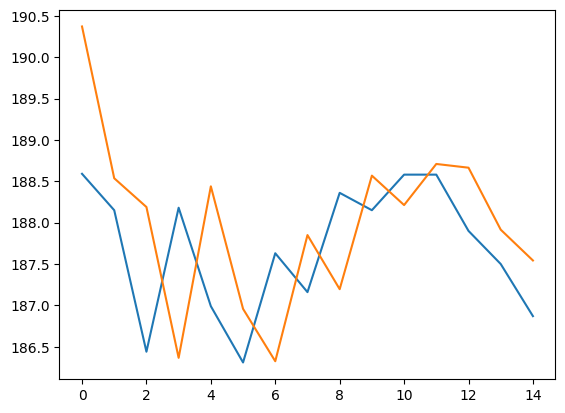

In [26]:

raw_values = np.array(data_stock)
diff_values = difference(raw_values, 1)
# converting into supervised
supervised = series_data_to_supervised_data(diff_values, 1)
supervised_values = supervised.values

# splitting the dataset 
train, test = supervised_values[0:-15], supervised_values[-15:]

# modify the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)
 
# Fittting into model
lstm_model = fit_rnn(train_scaled, 1, 1, 4)

 
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)
 
# forward validation
predictions = list()
for i in range(len(test_scaled)):
	# one step forecasting at a time
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_rnn(lstm_model, 1, X)
	# inverting the scale
	yhat = invert_scale(scaler, X, yhat)
  
	yhat = inverse_the_difference(raw_values, yhat, len(test_scaled)-i+1)
	# storing the forecasted data
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
 



# performance of the model
rmse = sqrt(mean_squared_error(raw_values[-15:], predictions))
print('\n Test RMSE: %.3f' % rmse)
# actual price vs predicted price
pyplot.plot(raw_values[-15:])
pyplot.plot(predictions)
pyplot.show()

# CNN Model


X.shape[1]),  1
X.shape[2])  1
Month=1, Predicted=151.508418, Expected=153.140000
Month=2, Predicted=151.977601, Expected=154.230000
Month=3, Predicted=153.877073, Expected=153.280000
Month=4, Predicted=154.027956, Expected=154.120000
Month=5, Predicted=153.901985, Expected=153.810000
Month=6, Predicted=154.212581, Expected=154.480000
Month=7, Predicted=154.353726, Expected=153.480000
Month=8, Predicted=154.254938, Expected=155.390000
Month=9, Predicted=154.594562, Expected=155.300000
Month=10, Predicted=155.583858, Expected=155.840000
Month=11, Predicted=155.783880, Expected=155.900000
Month=12, Predicted=156.102911, Expected=156.550000
Month=13, Predicted=156.434518, Expected=156.000000
Month=14, Predicted=156.532096, Expected=156.990000
Month=15, Predicted=156.691038, Expected=159.880000
Month=16, Predicted=158.555706, Expected=160.470000
Month=17, Predicted=160.386897, Expected=159.760000
Month=18, Predicted=160.378440, Expected=155.980000
Month=19, Predicted=158.255160, Expected=1

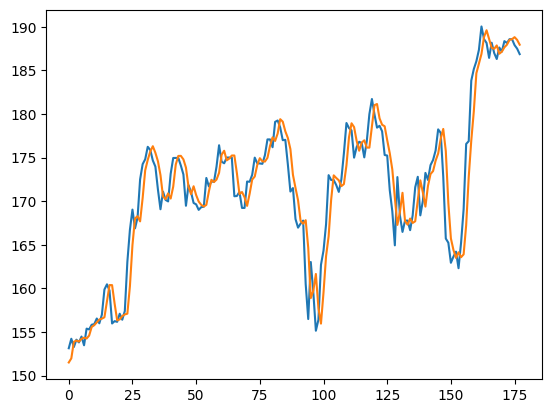

In [27]:

raw_values = np.array(data_stock)
diff_values = difference(raw_values, 1)
# converting into supervised
supervised = series_data_to_supervised_data(diff_values, 1)
supervised_values = supervised.values

# splitting the dataset 
train, test = supervised_values[0:-178], supervised_values[-178:]

# modify the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)
 
# Fittting into model
cnn_model = fit_cnn(train_scaled, 1, 1, 1)

 
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
cnn_model.predict(train_reshaped, batch_size=1)
 
# forward validation
predictions = list()
for i in range(len(test_scaled)):
	# one step forecasting at a time
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_cnn(cnn_model, 1, X)
	# inverting the scale
	yhat = invert_scale(scaler, X, yhat)
  
	yhat = inverse_the_difference(raw_values, yhat, len(test_scaled)-i+1)
	# storing the forecasted data
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
 



# performance of the model
rmse = sqrt(mean_squared_error(raw_values[-178:], predictions))
print('Test RMSE: %.3f' % rmse)
# actual price vs predicted price
pyplot.plot(raw_values[-178:])
pyplot.plot(predictions)
pyplot.show()

## Over 15 test rows

X.shape[1]),  1
X.shape[2])  1
Month=1, Predicted=191.917951, Expected=188.590000
Month=2, Predicted=187.672661, Expected=188.150000
Month=3, Predicted=187.916255, Expected=186.440000
Month=4, Predicted=185.346686, Expected=188.180000
Month=5, Predicted=189.421735, Expected=186.990000
Month=6, Predicted=186.248635, Expected=186.310000
Month=7, Predicted=185.913816, Expected=187.630000
Month=8, Predicted=188.587468, Expected=187.160000
Month=9, Predicted=186.905950, Expected=188.360000
Month=10, Predicted=189.236249, Expected=188.150000
Month=11, Predicted=188.071925, Expected=188.580000
Month=12, Predicted=188.935093, Expected=188.580000
Month=13, Predicted=188.644058, Expected=187.900000
Month=14, Predicted=187.503816, Expected=187.500000
Month=15, Predicted=187.293328, Expected=186.870000
Test RMSE: 1.567


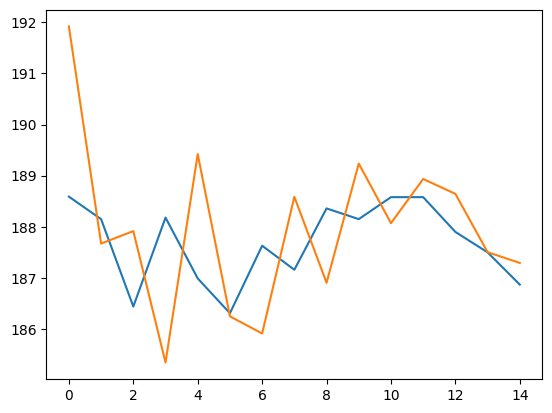

In [28]:

raw_values = np.array(data_stock)
diff_values = difference(raw_values, 1)
# converting into supervised
supervised = series_data_to_supervised_data(diff_values, 1)
supervised_values = supervised.values

# splitting the dataset 
train, test = supervised_values[0:-15], supervised_values[-15:]

# modify the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)
 
# Fittting into model
cnn_model = fit_cnn(train_scaled, 1, 1, 1)

 
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
cnn_model.predict(train_reshaped, batch_size=1)
 
# forward validation
predictions = list()
for i in range(len(test_scaled)):
	# one step forecasting at a time
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_cnn(cnn_model, 1, X)
	# inverting the scale
	yhat = invert_scale(scaler, X, yhat)
  
	yhat = inverse_the_difference(raw_values, yhat, len(test_scaled)-i+1)
	# storing the forecasted data
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
 



# performance of the model
rmse = sqrt(mean_squared_error(raw_values[-15:], predictions))
print('Test RMSE: %.3f' % rmse)
# actual price vs predicted price
pyplot.plot(raw_values[-15:])
pyplot.plot(predictions)
pyplot.show()

# Bi-directional LSTM


X.shape[1]),  1
X.shape[2])  1
Month=1, Predicted=150.911531, Expected=153.140000
Month=2, Predicted=153.005728, Expected=154.230000
Month=3, Predicted=154.072406, Expected=153.280000
Month=4, Predicted=153.235810, Expected=154.120000
Month=5, Predicted=153.993490, Expected=153.810000
Month=6, Predicted=153.728931, Expected=154.480000
Month=7, Predicted=154.366358, Expected=153.480000
Month=8, Predicted=153.470814, Expected=155.390000
Month=9, Predicted=155.292848, Expected=155.300000
Month=10, Predicted=155.229893, Expected=155.840000
Month=11, Predicted=155.774809, Expected=155.900000
Month=12, Predicted=155.857192, Expected=156.550000
Month=13, Predicted=156.505689, Expected=156.000000
Month=14, Predicted=156.006088, Expected=156.990000
Month=15, Predicted=156.963099, Expected=159.880000
Month=16, Predicted=159.941299, Expected=160.470000
Month=17, Predicted=160.506780, Expected=159.760000
Month=18, Predicted=159.847458, Expected=155.980000
Month=19, Predicted=156.541113, Expected=1

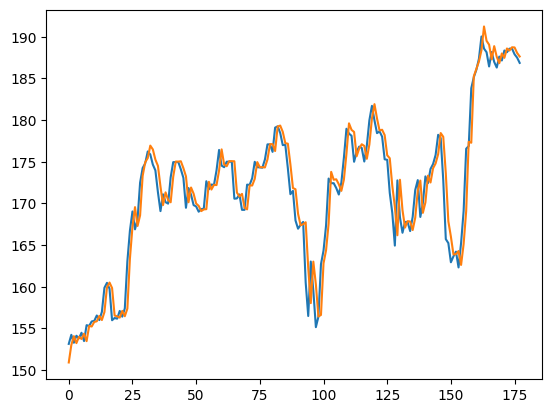

In [29]:

raw_values = np.array(data_stock)
diff_values = difference(raw_values, 1)
# converting into supervised
supervised = series_data_to_supervised_data(diff_values, 1)
supervised_values = supervised.values

# splitting the dataset 
train, test = supervised_values[0:-178], supervised_values[-178:]

# modify the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)
 
# Fittting into model
bilstm_model = fit_bilstm(train_scaled, 1, 1, 1)

 
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
bilstm_model.predict(train_reshaped, batch_size=1)
 
# forward validation
predictions = list()
for i in range(len(test_scaled)):
	# one step forecasting at a time
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_bilstm(bilstm_model, 1, X)
	# inverting the scale
	yhat = invert_scale(scaler, X, yhat)
  
	yhat = inverse_the_difference(raw_values, yhat, len(test_scaled)-i+1)
	# storing the forecasted data
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
 



# performance of the model
rmse = sqrt(mean_squared_error(raw_values[-178:], predictions))
print('\n Test RMSE: %.3f' % rmse)
# actual price vs predicted price
pyplot.plot(raw_values[-178:])
pyplot.plot(predictions)
pyplot.show()

## Over 15 test rows

X.shape[1]),  1
X.shape[2])  1
Month=1, Predicted=187.110174, Expected=186.310000
Month=2, Predicted=186.392653, Expected=187.630000
Month=3, Predicted=187.798523, Expected=187.160000
Month=4, Predicted=187.285731, Expected=188.360000
Month=5, Predicted=188.550843, Expected=188.150000
Month=6, Predicted=188.306310, Expected=188.580000
Month=7, Predicted=188.748857, Expected=188.580000
Month=8, Predicted=188.733017, Expected=187.900000
Month=9, Predicted=188.003615, Expected=187.500000
Month=10, Predicted=187.585573, Expected=186.870000

 Test RMSE: 0.739


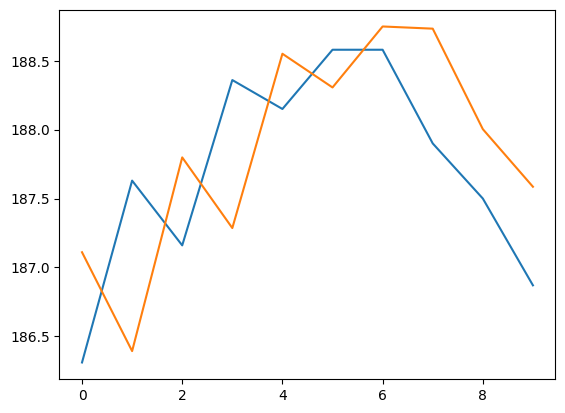

In [30]:

raw_values = np.array(data_stock)
diff_values = difference(raw_values, 1)
# converting into supervised
supervised = series_data_to_supervised_data(diff_values, 1)
supervised_values = supervised.values

# splitting the dataset 
train, test = supervised_values[0:-10], supervised_values[-10:]

# modify the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)
 
# Fittting into model
bilstm_model = fit_bilstm(train_scaled, 1, 1, 1)

 
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
bilstm_model.predict(train_reshaped, batch_size=1)
 
# forward validation
predictions = list()
for i in range(len(test_scaled)):
	# one step forecasting at a time
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_bilstm(bilstm_model, 1, X)
	# inverting the scale
	yhat = invert_scale(scaler, X, yhat)
  
	yhat = inverse_the_difference(raw_values, yhat, len(test_scaled)-i+1)
	# storing the forecasted data
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
 



# performance of the model
rmse = sqrt(mean_squared_error(raw_values[-10:], predictions))
print('\n Test RMSE: %.3f' % rmse)
# actual price vs predicted price
pyplot.plot(raw_values[-10:])
pyplot.plot(predictions)
pyplot.show()

# Arima Model

In [31]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


The filename, directory name, or volume label syntax is incorrect.


In [32]:
import numpy as np
data_stock_np = np.array(data_stock)

In [33]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import numpy as np
from matplotlib import pyplot

#data = data[['Date']]
data = np.asarray(data_stock_np)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  891
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -1799.111
Date:                Fri, 13 Jan 2023   AIC                           3620.223
Time:                        01:34:44   BIC                           3672.926
Sample:                             0   HQIC                          3640.367
                                - 891                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2856      1.975     -0.651      0.515      -5.157       2.586
ar.L2         -0.8178      4.256     -0.192      0.848      -9.159       7.524
ar.L3          0.5087      5.348      0.095      0.9

C:\Users\polis\Program-Files\Miniconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


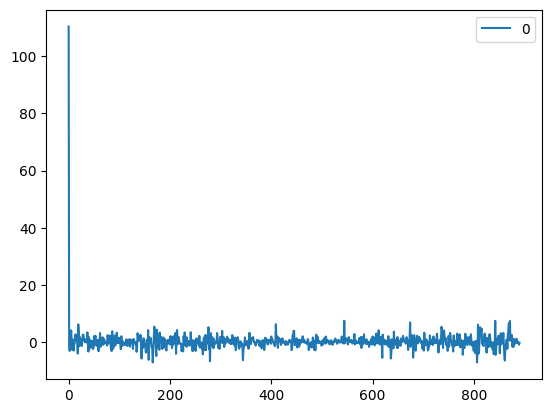

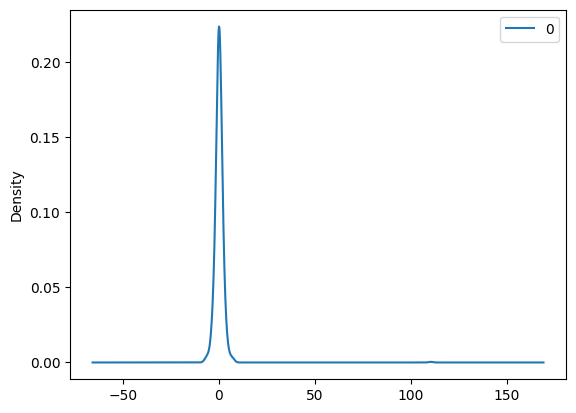

                0
count  891.000000
mean     0.210855
std      4.120987
min     -7.103912
25%     -0.742820
50%      0.056546
75%      0.966876
max    110.380000


In [36]:
model = ARIMA(data, order=(5,1,5))

model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

predicted=143.608176, expected=144.770000
predicted=144.784362, expected=144.020000
predicted=143.977548, expected=143.660000
predicted=143.644291, expected=143.340000
predicted=143.377365, expected=143.170000
predicted=143.160002, expected=141.630000
predicted=141.657881, expected=141.800000
predicted=141.878979, expected=141.050000
predicted=141.114360, expected=141.050000
predicted=141.078864, expected=141.830000
predicted=141.928846, expected=141.200000
predicted=141.160754, expected=140.680000
predicted=140.688279, expected=142.440000
predicted=142.505570, expected=142.270000
predicted=142.200036, expected=143.640000
predicted=143.610734, expected=144.530000
predicted=144.512529, expected=143.680000
predicted=143.517691, expected=143.790000
predicted=143.783120, expected=143.650000
predicted=143.626870, expected=146.580000
predicted=146.588935, expected=147.510000
predicted=147.453348, expected=147.060000
predicted=146.890607, expected=146.530000
predicted=146.490825, expected=148

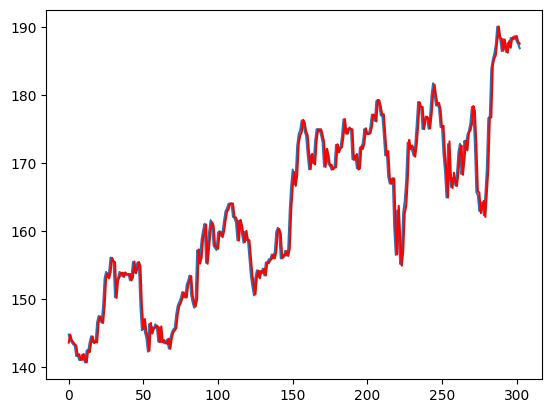

In [37]:
from math import sqrt
from sklearn.metrics import mean_squared_error
X = data
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)

pyplot.plot(predictions, color='red')
pyplot.show()

predicted=190.044873, expected=188.590000
predicted=188.250490, expected=188.150000
predicted=188.039568, expected=186.440000
predicted=186.285070, expected=188.180000
predicted=187.965744, expected=186.990000
predicted=186.603642, expected=186.310000
predicted=185.976972, expected=187.630000
predicted=187.693149, expected=187.160000
predicted=186.828268, expected=188.360000
predicted=188.257963, expected=188.150000
predicted=188.076203, expected=188.580000
predicted=188.450625, expected=188.580000
predicted=188.540921, expected=187.900000
predicted=187.723942, expected=187.500000
predicted=187.417437, expected=186.870000
Test RMSE: 1.024


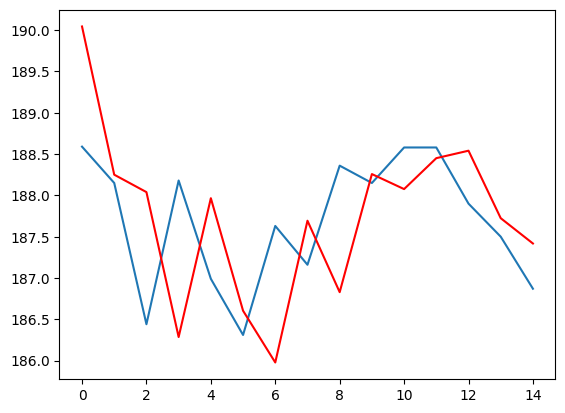

In [38]:
from math import sqrt
from sklearn.metrics import mean_squared_error
X = data
size = 876
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)

pyplot.plot(predictions, color='red')
pyplot.show()

# Make results for comparision

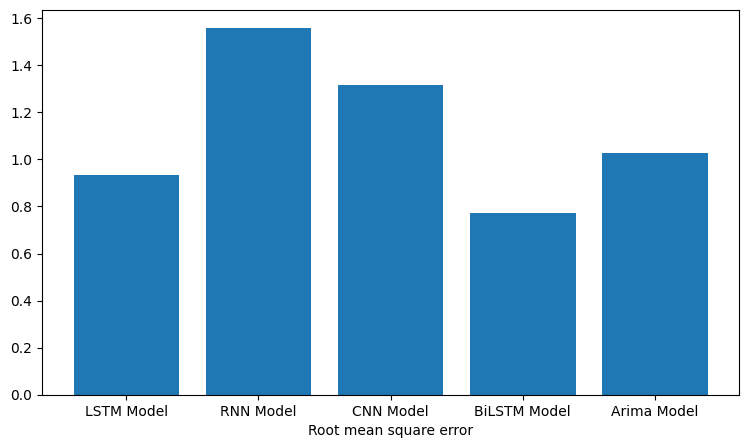

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 5))

# models 
Models_used = ["LSTM Model", "RNN Model", "CNN Model","BiLSTM Model","Arima Model"]

root_mean_square = [0.932,1.558, 1.317 ,0.773,1.028]

plt.bar(Models_used, root_mean_square)
plt.xlabel("Root mean square error") 

plt.show()